# Initialisation

In [221]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import scipy.sparse

# Partie 1 : Approximation spatiale du Laplacien

## Condition de Dirichlet

In [222]:
#  Discrétisation en espace
xmin = 0.0; xmax = 1.8; nptx = 16; nx = nptx-2  
hx = (xmax-xmin)/(nptx -1)
xx = np.linspace(xmin,xmax,nptx) 
xx = xx.transpose()
xxint = xx[1:nx+1]
ymin = 0.0; ymax = 1.0; npty = 16; ny = npty-2 
hy = (ymax-ymin)/(npty -1)
yy = np.linspace(ymin,ymax,npty)
yy=yy.transpose() 
yyint = yy[1:ny+1]

In [223]:
# condition mu
mu = 1

#création de la matrice B
B = scipy.sparse.diags([-mu/hx**2, mu*(2/hy**2 + 2/hx**2), -mu/hx**2], [-1, 0, 1], shape=(nx+2,nx+2), format = 'lil').toarray()
B[0,0] = 1 # condition limite
B[-1,-1] = 1
B[0,1]=0
B[-1,-2] = 0

#création de la matrice C
C = -mu/hy**2*np.eye(nx+2)
C[0,0] = 0
C[-1,-1] = 0

#création de la matrice bloc tridiagonal A
A = np.zeros(((ny+2) * B.shape[0], (ny+2) * B.shape[1]))
A[:B.shape[0], :B.shape[1]] = np.eye(B.shape[0])

for i in range(1,(ny+2)):
    A[i * B.shape[0]:(i + 1) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = B

for i in range((ny+2) - 2):
    A[(i + 1) * B.shape[0]:(i + 2) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = C

for i in range(1,(ny+2) - 1):
    A[i * B.shape[0]:(i + 1) * B.shape[0], (i + 1) * B.shape[1]:(i + 2) * B.shape[1]] = C

A[((ny+2) - 1) * B.shape[0]:, ((ny+2) - 1) * B.shape[1]:] = np.eye(B.shape[0])

#plot pour visualiser nos matrices
# plt.imshow(A, cmap='viridis')
# plt.imshow(B, cmap='viridis')
# plt.imshow(C, cmap='viridis')

In [224]:
#  Solution and source terms
u = np.zeros((nx+2)*(ny+2)) #Numerical solution
u_ex = np.zeros((nx+2)*(ny+2)) #Exact solution
F = np.zeros((nx+2)*(ny+2)) #Source term

# Source term
def Source_int(x):
    return (np.pi**2+ (np.pi**2)/xmax**2)*(np.sin(np.pi*x[0]/xmax)*np.sin(np.pi*x[1]))
def Source_bnd(x):
    return np.sin(np.pi*x[0]/xmax)*np.sin(np.pi*x[1])
def Sol_sin(x):
    return np.sin(np.pi*x[0]/xmax)*np.sin(np.pi*x[1])
for i in range(nptx):
    for j in range(npty):
        coord = np.array([i*hx,j*hy])
        u_ex[j*(nx+2) + i] = Sol_sin(coord)
    if i==0 or i==nptx-1: # Boundary x=0 ou x=xmax
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            F[j*(nx+2) + i]=Source_bnd(coord)
    else:
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            if j==0 or j==npty-1: # Boundary y=0 ou y=ymax
                F[j*(nx+2) + i]=Source_bnd(coord)
            else:
                F[j*(nx+2) + i]=Source_int(coord)

Text(0.5, 0.92, 'Solution approchée')

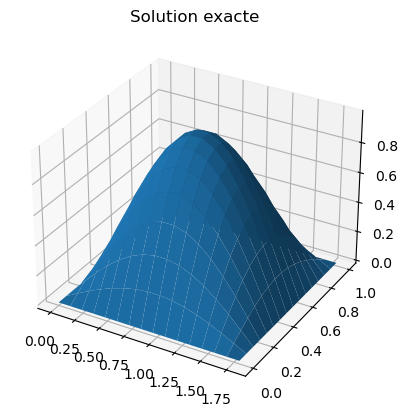

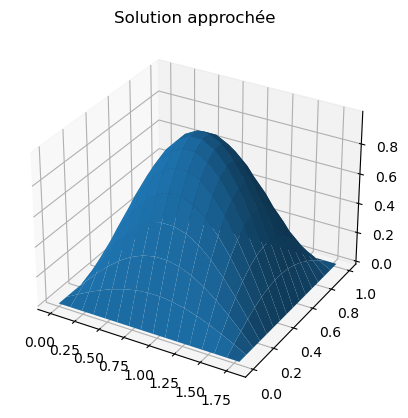

In [225]:
#Post-traintement u_ex+Visualization of the exact solution
uu_ex = np.reshape(u_ex,(nx+2 ,ny+2),order = 'F');
X,Y = np.meshgrid(xx,yy)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu_ex.T,rstride = 1, cstride = 1);
plt.title("Solution exacte")

#solution approchée
u = npl.solve(A,F)
uu = np.reshape(u,(nx+2 ,ny+2),order = 'F');
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu.T,rstride = 1, cstride = 1);
plt.title("Solution approchée")

In [226]:
# Error
print('norm L2 = ',npl.norm(u-u_ex))

norm L2 =  0.027475801675018556


## Condition de Neumann

In [227]:
#  Discrétisation en espace
xmin = 0.0; xmax = 1.8; nptx = 16; nx = nptx-2  
hx = (xmax-xmin)/(nptx -1)
xx = np.linspace(xmin,xmax,nptx) 
xx = xx.transpose()
xxint = xx[1:nx+1]
ymin = 0.0; ymax = 1.0; npty = 16; ny = npty-2 
hy = (ymax-ymin)/(npty -1)
yy = np.linspace(ymin,ymax,npty)
yy=yy.transpose() 
yyint = yy[1:ny+1]

In [228]:
# condition mu
mu = 1

#création de la matrice B
B = scipy.sparse.diags([-mu/hx**2, mu*(2/hy**2 + 2/hx**2), -mu/hx**2], [-1, 0, 1], shape=(nx+2,nx+2), format = 'lil').toarray()
B[0,0] = 1
B[0,1]=0
B[-1,-1]=3/(2*hx)
B[-1,-2]=-4/(2*hx)
B[-1,-3]=1/(2*hx)

#création de la matrice C
C = -mu/hy**2*np.eye(nx+2)
C[0,0] = 0
C[-1,-1] = 0

#création de la matrice bloc tridiagonal A
A = np.zeros(((ny+2) * B.shape[0], (ny+2) * B.shape[1]))
A[:B.shape[0], :B.shape[1]] = np.eye(B.shape[0])

for i in range(1,(ny+2)):
    A[i * B.shape[0]:(i + 1) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = B

for i in range((ny+2) - 2):
    A[(i + 1) * B.shape[0]:(i + 2) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = C

for i in range(1,(ny+2) - 1):
    A[i * B.shape[0]:(i + 1) * B.shape[0], (i + 1) * B.shape[1]:(i + 2) * B.shape[1]] = C

A[((ny+2) - 1) * B.shape[0]:, ((ny+2) - 1) * B.shape[1]:] = np.eye(B.shape[0])

# plt.imshow(A, cmap='viridis')
# plt.imshow(B, cmap='viridis')
# plt.imshow(C, cmap='viridis')

In [229]:
# Solution and source terms
u = np.zeros((nx+2)*(ny+2)) #Numerical solution
u_ex = np.zeros((nx+2)*(ny+2)) #Exact solution
F = np.zeros((nx+2)*(ny+2)) #Source term

# Source term
def Source_int_2(x):
    return ((np.pi/xmax)**2 + np.pi**2)*(np.cos(np.pi*x[0]/xmax)*np.sin(np.pi*x[1])) - (np.pi**2)*(np.sin(np.pi*x[1]))
def Source_bnd_2(x):
    return 0
def Sol_sin_2(x):
    return (np.cos(np.pi*x[0]/xmax) -1)*np.sin(np.pi*x[1]/ymax)
for i in range(nptx):
    for j in range(npty):
        coord = np.array([i*hx,j*hy])
        u_ex[j*(nx+2) + i] = Sol_sin_2(coord)
    if i==0 or i==nptx-1: # Boundary x=0 ou x=xmax
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            F[j*(nx+2) + i]=Source_bnd_2(coord)
    else:
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            if j==0 or j==npty-1: # Boundary y=0 ou y=ymax
                F[j*(nx+2) + i]=Source_bnd_2(coord)
            else:
                F[j*(nx+2) + i]=Source_int_2(coord)

Text(0.5, 0.92, 'Solution approchée')

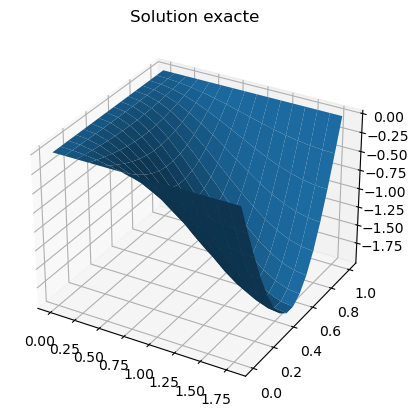

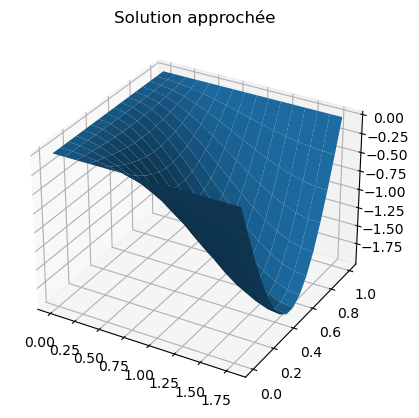

In [230]:
#Post-traitement u_ex+Visualiation of the exact solution
uu_ex = np.reshape(u_ex,(nx+2 ,ny+2),order = 'F');
X,Y = np.meshgrid(xx,yy)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu_ex.T,rstride = 1, cstride = 1);
plt.title("Solution exacte")

#solution approchée
u = npl.solve(A,F)
uu = np.reshape(u,(nx+2 ,ny+2),order = 'F');
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu.T,rstride = 1, cstride = 1);
plt.title("Solution approchée")

In [231]:
# Error
print('norm L2 = ',npl.norm(u-u_ex))

norm L2 =  0.04550078316861476


# Partie 2 : Approximation des termes advectifs

In [232]:
mu = 1
vx = 100
B = scipy.sparse.diags([-mu/hx**2 - vx/(2*hx), mu*(2/hy**2 + 2/hx**2), -mu/hx**2 + vx/(2*hx)], [-1, 0, 1], shape=(nx+2,nx+2), format = 'lil').toarray()
B[0,0] = 1
B[0,1]=0
B[-1,-1]=3/(2*hx)
B[-1,-2]=-4/(2*hx)
B[-1,-3]=1/(2*hx)

C = -mu/hy**2*np.eye(nx+2)
C[0,0] = 0
C[-1,-1] = 0

A = np.zeros(((ny+2) * B.shape[0], (ny+2) * B.shape[1]))
A[:B.shape[0], :B.shape[1]] = np.eye(B.shape[0])

for i in range(1,(ny+2)):
    A[i * B.shape[0]:(i + 1) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = B

for i in range((ny+2) - 2):
    A[(i + 1) * B.shape[0]:(i + 2) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = C

for i in range(1,(ny+2) - 1):
    A[i * B.shape[0]:(i + 1) * B.shape[0], (i + 1) * B.shape[1]:(i + 2) * B.shape[1]] = C

A[((ny+2) - 1) * B.shape[0]:, ((ny+2) - 1) * B.shape[1]:] = np.eye(B.shape[0])

##  Solution and source terms
u = np.zeros((nx+2)*(ny+2)) #Numerical solution
u_ex = np.zeros((nx+2)*(ny+2)) #Exact solution
F = np.zeros((nx+2)*(ny+2)) #Source term

In [233]:
# Source term
def Source_int_2(x):
    return ((np.pi/xmax)**2 + np.pi**2)*(np.cos(np.pi*x[0]/xmax)*np.sin(np.pi*x[1])) - (np.pi**2)*(np.sin(np.pi*x[1])) - vx*(np.pi/xmax)*np.sin(np.pi*x[1])*np.sin(np.pi*x[0]/xmax)
def Source_bnd_2(x):
    return 0
def Sol_sin_2(x):
    return (np.cos(np.pi*x[0]/xmax) -1)*np.sin(np.pi*x[1]/ymax)
for i in range(nptx):
    for j in range(npty):
        coord = np.array([i*hx,j*hy])
        u_ex[j*(nx+2) + i] = Sol_sin_2(coord)
    if i==0 or i==nptx-1: # Boundary x=0 ou x=xmax
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            F[j*(nx+2) + i]=Source_bnd_2(coord)
    else:
        for j in range(npty):
            coord = np.array([i*hx,j*hy])
            if j==0 or j==npty-1: # Boundary y=0 ou y=ymax
                F[j*(nx+2) + i]=Source_bnd_2(coord)
            else:
                F[j*(nx+2) + i]=Source_int_2(coord)

Text(0.5, 0.92, 'Solution approchée')

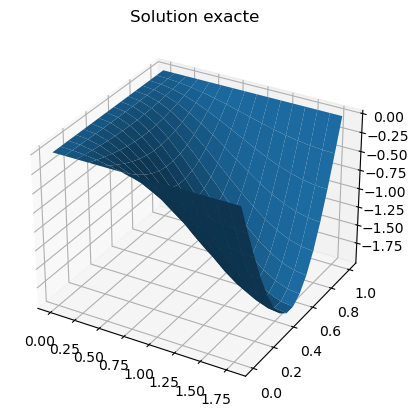

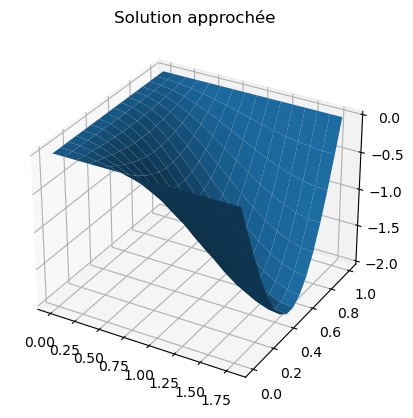

In [234]:
#Post-traintement u_ex+Visualization of the exct solution
uu_ex = np.reshape(u_ex,(nx+2 ,ny+2),order = 'F');
X,Y = np.meshgrid(xx,yy)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu_ex.T,rstride = 1, cstride = 1);
plt.title("Solution exacte")

#Solution approchée
u = npl.solve(A,F)
uu = np.reshape(u,(nx+2 ,ny+2),order = 'F');
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,uu.T,rstride = 1, cstride = 1);
plt.title("Solution approchée")

In [235]:
# Error
print('norm L2 = ',npl.norm(u-u_ex))

norm L2 =  0.09682756900190716


# Partie 3 : Marches en temps

## Condition initiale 1

In [212]:
#  Discrétisation en espace
xmin = 0.0; xmax = 2; nptx = 61; nx = nptx-2  
hx = (xmax-xmin)/(nptx -1)
xx = np.linspace(xmin,xmax,nptx) 
xx = xx.transpose()
xxint = xx[1:nx+1]
ymin = 0.0; ymax = 1.0; npty = 31; ny = npty-2 
hy = (ymax-ymin)/(npty -1)
yy = np.linspace(ymin,ymax,npty)
yy=yy.transpose() 
yyint = yy[1:ny+1]

In [213]:
# =============================================================================
### Parameters
mu = 0.01 # Diffusion parameter
vx = 1 # Vitesse along x
# =============================================================================

cfl = 0.2  # cfl =mu*dt/hx^2+mu*dt/hy^2 ou v*dt/h
dt = (hx**2)*(hy**2)*cfl/(mu*(hx**2 + hy**2)) # dt = pas de temps
dt = cfl*hx/vx
print("dt = ",dt)
Tfinal = 1.0  # Final time

dt =  0.006666666666666667


In [214]:
B = scipy.sparse.diags([-mu/hx**2 - vx/(2*hx), mu*(2/hy**2 + 2/hx**2), -mu/hx**2 + vx/(2*hx)], [-1, 0, 1], shape=(nx+2,nx+2), format = 'lil').toarray()
B[0,0] = 1
B[0,1]=0
B[-1,-1]=3/(2*hx)
B[-1,-2]=-4/(2*hx)
B[-1,-3]=1/(2*hx)

C = -mu/hy**2*np.eye(nx+2)
C[0,0] = 0
C[-1,-1] = 0


A2D = np.zeros(((ny+2) * B.shape[0], (ny+2) * B.shape[1]))
A2D[:B.shape[0], :B.shape[1]] = np.eye(B.shape[0])

for i in range(1,(ny+2)):
    A2D[i * B.shape[0]:(i + 1) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = B

for i in range((ny+2) - 2):
    A2D[(i + 1) * B.shape[0]:(i + 2) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = C

for i in range(1,(ny+2) - 1):
    A2D[i * B.shape[0]:(i + 1) * B.shape[0], (i + 1) * B.shape[1]:(i + 2) * B.shape[1]] = C

A2D[((ny+2) - 1) * B.shape[0]:, ((ny+2) - 1) * B.shape[1]:] = np.eye(B.shape[0])

u = np.zeros((nx+2)*(ny+2))
u_ex = np.zeros((nx+2)*(ny+2))
err = np.zeros((nx+2)*(ny+2))
F = np.zeros((nx+2)*(ny+2))

In [215]:
# Calculer la norme de Frobenius
frobenius_norm = np.linalg.norm(A2D, 'fro')

# Afficher le résultat
print("Norme de Frobenius de la matrice A : ", frobenius_norm)
print("Condition d'inversibilite", 2/frobenius_norm)
dt = 0.1*dt #mise en place de la condition 
print("dt après condition : ", dt)

Norme de Frobenius de la matrice A :  1926.543796543437
Condition d'inversibilite 0.001038128488741526
dt après condition :  0.0006666666666666668


In [216]:
#
# =============================================================================
# Time stepping
# =============================================================================
s0 = 0.1
x0 = 0.25
y0=0.5

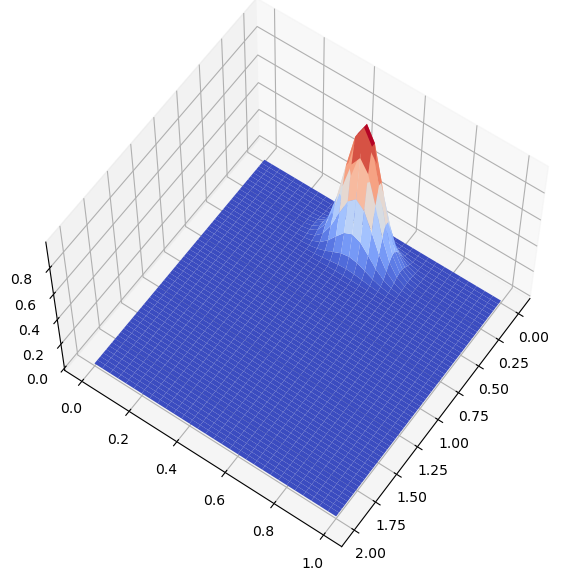

<Figure size 640x480 with 0 Axes>

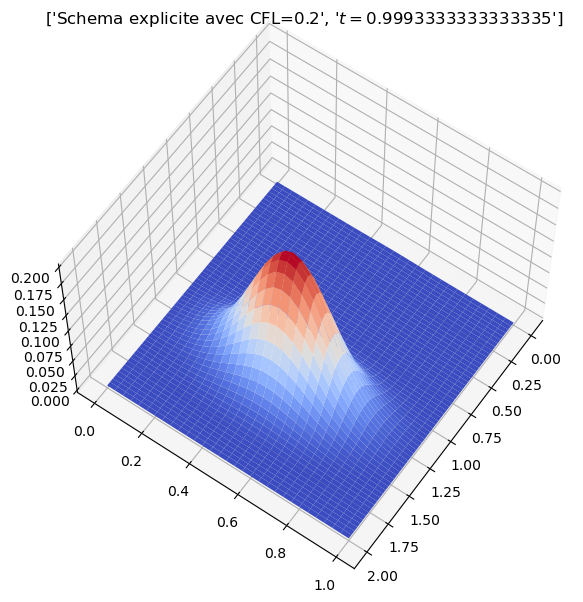

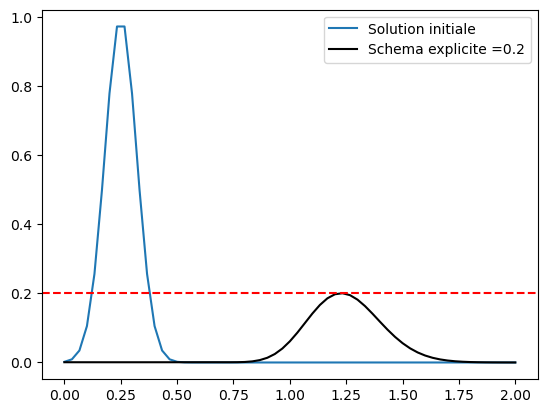

In [217]:
def Sol_init(x):
    return np.exp( -((x[0]-x0)/s0)**2 -((x[1]-y0)/s0)**2   )

u_init = np.zeros((nx+2)*(ny+2))

for i in range(nptx):
     for j in range(npty):
             coord = np.array([xmin+i*hx,ymin+j*hy])
             u_init[j*(nx+2) + i] = Sol_init(coord)

uu_init = np.reshape(u_init,(nx+2 ,ny+2),order = 'F');

fig = plt.figure(figsize=(10, 7))
X,Y = np.meshgrid(xx,yy)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, uu_init.T, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.view_init(60, 35)
plt.pause(1.)
             
## Initialize u by the initial data u0
u = u_init.copy()

# Nombre de pas de temps effectues
nt = int(Tfinal/dt)
Tfinal = nt*dt # on corrige le temps final (si Tfinal/dt n'est pas entier)

def CN(u0, dt, A2D):
    m = len(u0)
    u0[0:m] = np.linalg.solve(np.eye(m)/dt + A2D/2, (np.eye(m)/dt - A2D/2)@u0[0:m])
    return u0
    

time = 0.0
u_1 = CN(u, dt, A2D)
n = 0
while time < Tfinal:
    u_1 = CN(u_1, dt, A2D)
    time = time + dt
    n += 1
    
    

#Print solution
    if n%1499 == 0:
      plt.figure(1)
      plt.clf()
      fig = plt.figure(figsize=(10, 7))
      ax = plt.axes(projection='3d')
      uu = np.reshape(u_1,(nx+2 ,ny+2),order = 'F');
      surf = ax.plot_surface(X, Y, uu.T, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
      ax.view_init(60, 35)
      plt.title(['Schema explicite avec CFL=%s' %(cfl), '$t=$%s' %(n*dt)])
      plt.pause(0.1)

###################################################################
#comparaison solution exacte avec solution numerique au temps final
j0 = int((npty-1)/2)


plt.figure(2)
plt.clf()
x = np.linspace(xmin,xmax,nptx)
plt.plot(x,uu_init[:,j0],x,uu[:,j0],'k') #,x,uexacte,'or')
plt.legend(['Solution initiale','Schema explicite =%s' %(cfl)]) #,'solution exacte'],loc='best')
plt.axhline(y=0.2, color='r', linestyle='--')
plt.show()

## Condition initiale 2

In [237]:
#  Discrétisation en espace
xmin = 0.0; xmax = 2; nptx = 61; nx = nptx-2  
hx = (xmax-xmin)/(nptx -1)
xx = np.linspace(xmin,xmax,nptx) 
xx = xx.transpose()
xxint = xx[1:nx+1]
ymin = 0.0; ymax = 1.0; npty = 31; ny = npty-2 
hy = (ymax-ymin)/(npty -1)
yy = np.linspace(ymin,ymax,npty)
yy=yy.transpose() 
yyint = yy[1:ny+1]

In [238]:
# =============================================================================
### Parameters
mu = 0.01 # Diffusion parameter
vx = 1 # Vitesse along x
# =============================================================================

cfl = 0.2  # cfl =mu*dt/hx^2+mu*dt/hy^2 ou v*dt/h
dt = (hx**2)*(hy**2)*cfl/(mu*(hx**2 + hy**2)) # dt = pas de temps
dt = cfl*hx/vx
print("dt = ",dt)
Tfinal = 0.55  # Final time

dt =  0.006666666666666667


In [239]:
B = scipy.sparse.diags([-mu/hx**2 - vx/(2*hx), mu*(2/hy**2 + 2/hx**2), -mu/hx**2 + vx/(2*hx)], [-1, 0, 1], shape=(nx+2,nx+2), format = 'lil').toarray()
B[0,0] = 1
B[0,1]=0
B[-1,-1]=3/(2*hx)
B[-1,-2]=-4/(2*hx)
B[-1,-3]=1/(2*hx)

C = -mu/hy**2*np.eye(nx+2)# print(B)

C[0,0] = 0
C[-1,-1] = 0

A2D = np.zeros(((ny+2) * B.shape[0], (ny+2) * B.shape[1]))
A2D[:B.shape[0], :B.shape[1]] = np.eye(B.shape[0])

for i in range(1,(ny+2)):
    A2D[i * B.shape[0]:(i + 1) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = B

for i in range((ny+2) - 2):
    A2D[(i + 1) * B.shape[0]:(i + 2) * B.shape[0], i * B.shape[1]:(i + 1) * B.shape[1]] = C

for i in range(1,(ny+2) - 1):
    A2D[i * B.shape[0]:(i + 1) * B.shape[0], (i + 1) * B.shape[1]:(i + 2) * B.shape[1]] = C

A2D[((ny+2) - 1) * B.shape[0]:, ((ny+2) - 1) * B.shape[1]:] = np.eye(B.shape[0])

u = np.zeros((nx+2)*(ny+2))
u_ex = np.zeros((nx+2)*(ny+2))
err = np.zeros((nx+2)*(ny+2))
F = np.zeros((nx+2)*(ny+2))


In [240]:
# Calculer la norme de Frobenius
frobenius_norm = np.linalg.norm(A2D, 'fro')

# Afficher le résultat
print("Norme de Frobenius de la matrice A : ", frobenius_norm)
print("Condition d'inversibilite", 2/frobenius_norm)
dt = 0.1*dt #mise en place de la condition 
print("dt après condition : ", dt)

Norme de Frobenius de la matrice A :  1926.543796543437
Condition d'inversibilite 0.001038128488741526
dt après condition :  0.0006666666666666668


In [241]:
#
# =============================================================================
# Time stepping
# =============================================================================
s0 = 0.1
x0 = 0.25
y0=0.5

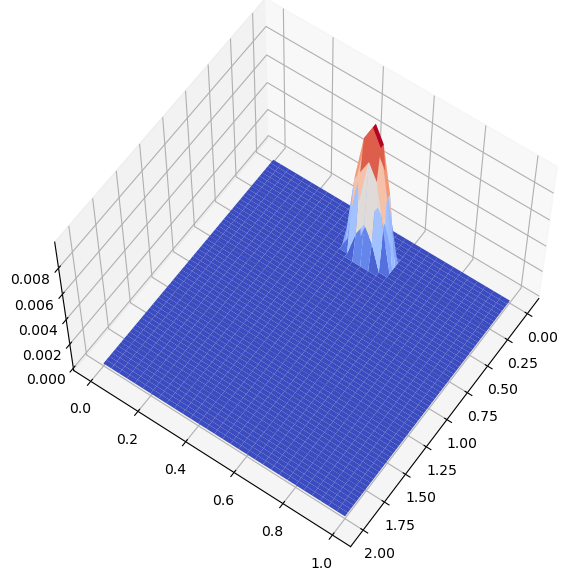

<Figure size 640x480 with 0 Axes>

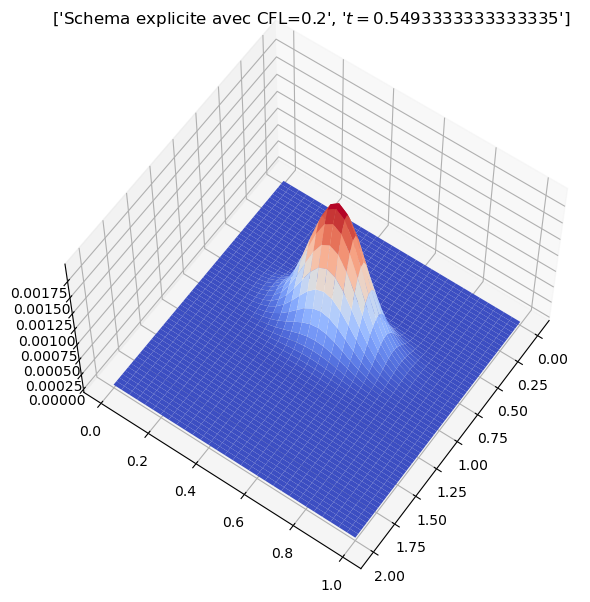

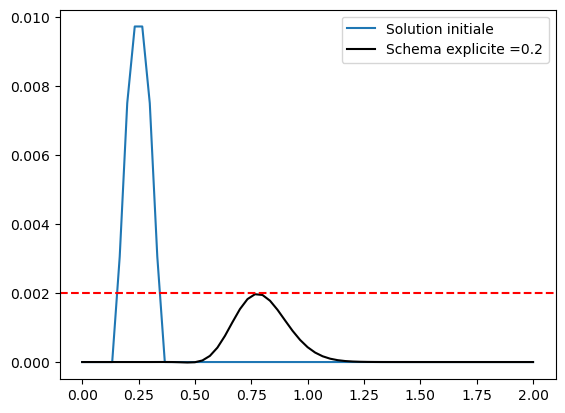

In [242]:
def Sol_init2(x):
    if (s0**2 -(x[0] -x0)**2 - (x[1] - y0)**2) > 0:
        return (s0**2 -(x[0] -x0)**2 - (x[1] - y0)**2)
    else:
        return 0

u_init2 = np.zeros((nx+2)*(ny+2))

for i in range(nptx):
     for j in range(npty):
             coord = np.array([xmin+i*hx,ymin+j*hy])
             u_init2[j*(nx+2) + i] = Sol_init2(coord)


uu_init = np.reshape(u_init2,(nx+2 ,ny+2),order = 'F');

fig = plt.figure(figsize=(10, 7))
X,Y = np.meshgrid(xx,yy)
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X, Y, uu_init.T, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.view_init(60, 35)
plt.pause(1.)
             
## Initialize u by the initial data u0
u = u_init2.copy()

# Nombre de pas de temps effectues
nt = int(Tfinal/dt)
Tfinal = nt*dt # on corrige le temps final (si Tfinal/dt n'est pas entier)

def CN(u0, dt, A2D):
    m = len(u0)
    u0[0:m] = np.linalg.solve(np.eye(m)/dt + A2D/2, (np.eye(m)/dt - A2D/2)@u0[0:m])
    return u0
    

time = 0.0
u_1 = CN(u, dt, A2D)
n = 0
while time < Tfinal:
    u_1 = CN(u_1, dt, A2D)
    time = time + dt
    n += 1
    

#Print solution
    if n%824 == 0:
      plt.figure(1)
      plt.clf()
      fig = plt.figure(figsize=(10, 7))
      ax = plt.axes(projection='3d')
      uu = np.reshape(u_1,(nx+2 ,ny+2),order = 'F');
      surf = ax.plot_surface(X, Y, uu.T, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
      ax.view_init(60, 35)
      plt.title(['Schema explicite avec CFL=%s' %(cfl), '$t=$%s' %(n*dt)])
      plt.pause(0.1)

###################################################################
#comparaison solution exacte avec solution numerique au temps final
j0 = int((npty-1)/2)


plt.figure(2)
plt.clf()
x = np.linspace(xmin,xmax,nptx)
plt.plot(x,uu_init[:,j0],x,uu[:,j0],'k') #,x,uexacte,'or')
plt.legend(['Solution initiale','Schema explicite =%s' %(cfl)]) #,'solution exacte'],loc='best')
plt.axhline(y=0.002, color='r', linestyle='--')
plt.show()